In [11]:
import matplotlib.pyplot as plt

In [49]:
import numpy as np

X = 2 * np.random.randn(100, 5)
X = 2 * np.random.randn(100,1)
n = 5*np.random.randn(100)
y = 2.5382 * np.cos(X) + X ** 2 - 0.5 

ValueError: x and y must be the same size

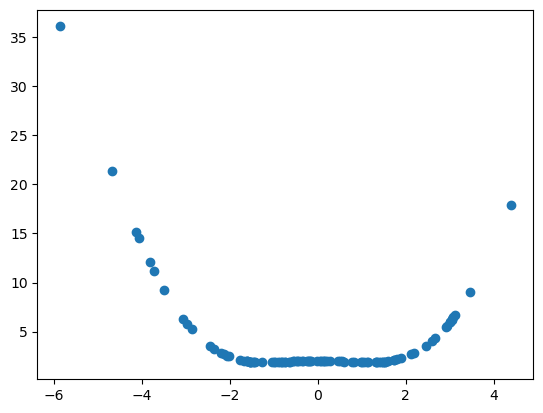

In [50]:
plt.scatter(X,y)
plt.scatter(X,y+n)

we have created a dataset with 100 points, with 5 features each. The relation we want to investigate is

$$
2.5382 cos(x_3)+x_0^2-0.5
$$

In [47]:
y

array([ 1.9513297 ,  2.65933469,  1.91894037, 19.30377764,  1.91721624,
        3.33590303,  1.95971097,  1.89038503,  2.82210168,  2.15904886,
        9.31889843,  2.03817893,  2.85728605,  1.86207898,  1.87554973,
       11.58301201,  2.03544726,  5.08520651,  1.88463665,  1.86041002,
        5.07537946, 26.44786854,  2.02902112,  5.5545742 ,  2.25742709,
        1.92163627,  1.94808904,  2.02081401,  1.86836866,  1.87059088,
        6.18331776,  1.96827739,  7.25488546,  2.1591475 ,  2.24486217,
        3.90617417,  4.67582947,  6.32195949,  8.46125401,  9.21341454,
        1.93419571,  2.00070959,  1.87390612,  5.32818813,  4.0923946 ,
        2.85545623,  4.96487073,  6.66334908,  4.22288573,  1.86031504,
        2.03658751,  1.97158389,  1.96588295, 27.50680033,  2.07295619,
        1.86882161,  1.92455358, 32.25244286,  7.51127258,  1.86119699,
        1.86864205,  2.20039911,  5.81551453,  1.94502531,  3.55996642,
        1.95778921,  2.12482695,  1.86155542,  2.02030036,  1.89

In [51]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)

In [ ]:
model.

In [52]:
model.fit(X, y)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!

Expressions evaluated per second: 1.890e+05
Head worker occupation: 8.9%
Progress: 431 / 600 total iterations (71.833%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           2.268e+01  2.522e-07  3.8297002
3           3.113e+00  9.930e-01  (x0 * x0)
5           2.277e+00  1.562e-01  (x0 * (x0 * 0.8663208))
6           1.226e+00  6.190e-01  ((x0 * x0) + cos(x0))
8           2.422e-01  8.109e-01  ((x0 * x0) + (cos(x0) * 2.4127216))
10          8.717e-06  5.116e+00  (((x0 * x0) + -0.49704763) + (cos(x0) * 2.5382006))
11          1.574e-10  1.092e+01  (((x0 * x0) + (cos(x0) * 2.5382078)) + sin(-0.5236129))
13          7.323e-11  3.827e-01  ((((1.0000013 * x0) * x0) + (cos(x0) * 2.5382078)) + sin(-0.52...
                                  36129))
16          5.689e-13  1.619e+00  (((x0 * x0) + -0.49704763) + (((cos(x0) * 2.5382006) + sin(1.4...
                        

PySRRegressor.equations_ = [
	   pick      score                                           equation  \
	0         0.000000                                          3.8297002   
	1         0.993028                                          (x0 * x0)   
	2         0.156195                            (x0 * (x0 * 0.8663208))   
	3         0.619041                              ((x0 * x0) + cos(x0))   
	4         0.810923                ((x0 * x0) + (cos(x0) * 2.4127216))   
	5  >>>>  13.596594   (((x0 * x0) + -0.49999997) + (cos(x0) * 2.5382))   
	6         0.000798  ((((x0 * (x0 + (sin(exp(0.019205522)) * -4.913...   
	
	           loss  complexity  
	0  2.268019e+01           1  
	1  3.112531e+00           3  
	2  2.277428e+00           5  
	3  1.226305e+00           6  
	4  2.422366e-01           8  
	5  3.753087e-13          10  
	6  3.723244e-13          20  
]

In [7]:
print(model)

PySRRegressor.equations_ = [
	   pick      score                                   equation          loss  \
	0         0.000000                                  3.2374184  3.211113e+01   
	1         1.204650                                  (x0 * x0)  2.886092e+00   
	2         0.019408                  ((x0 * x0) + -0.33160332)  2.776213e+00   
	3         0.857358                      ((x0 * x0) + cos(x3))  1.177896e+00   
	4         0.780101        ((x0 * x0) + (cos(x3) * 2.4619434))  2.474685e-01   
	5  >>>>  13.730534  ((x0 * x0) + ((cos(x3) * 2.5382) + -0.5))  2.933118e-13   
	
	   complexity  
	0           1  
	1           3  
	2           5  
	3           6  
	4           8  
	5          10  
]


In [24]:
z=model.predict(X, 3)

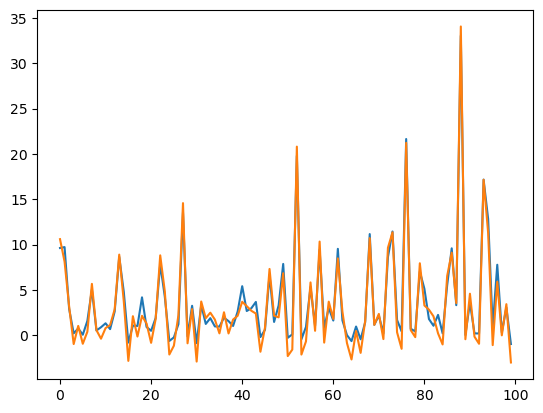

In [25]:
plt.plot(z)
plt.plot(y)

### Detailed Example

The following code makes use of as many PySR features as possible. Note that is just a demonstration of features and you should not use this example as-is. For details on what each parameter does, check out the API page.

In [ ]:
model = PySRRegressor(
    procs=4,
    populations=8,
    # ^ 2 populations per core, so one is always running.
    population_size=50,
    # ^ Slightly larger populations, for greater diversity.
    ncyclesperiteration=500, 
    # ^ Generations between migrations.
    niterations=10000000,  # Run forever
    early_stop_condition=(
        "stop_if(loss, complexity) = loss < 1e-6 && complexity < 10"
        # Stop early if we find a good and simple equation
    ),
    timeout_in_seconds=60 * 60 * 24,
    # ^ Alternatively, stop after 24 hours have passed.
    maxsize=50,
    # ^ Allow greater complexity.
    maxdepth=10,
    # ^ But, avoid deep nesting.
    binary_operators=["*", "+", "-", "/"],
    unary_operators=["square", "cube", "exp", "cos2(x)=cos(x)^2"],
    constraints={
        "/": (-1, 9),
        "square": 9,
        "cube": 9,
        "exp": 9,
    },
    # ^ Limit the complexity within each argument.
    # "inv": (-1, 9) states that the numerator has no constraint,
    # but the denominator has a max complexity of 9.
    # "exp": 9 simply states that `exp` can only have
    # an expression of complexity 9 as input.
    nested_constraints={
        "square": {"square": 1, "cube": 1, "exp": 0},
        "cube": {"square": 1, "cube": 1, "exp": 0},
        "exp": {"square": 1, "cube": 1, "exp": 0},
    },
    # ^ Nesting constraints on operators. For example,
    # "square(exp(x))" is not allowed, since "square": {"exp": 0}.
    complexity_of_operators={"/": 2, "exp": 3},
    # ^ Custom complexity of particular operators.
    complexity_of_constants=2,
    # ^ Punish constants more than variables
    select_k_features=4,
    # ^ Train on only the 4 most important features
    progress=True,
    # ^ Can set to false if printing to a file.
    weight_randomize=0.1,
    # ^ Randomize the tree much more frequently
    cluster_manager=None,
    # ^ Can be set to, e.g., "slurm", to run a slurm
    # cluster. Just launch one script from the head node.
    precision=64,
    # ^ Higher precision calculations.
    warm_start=True,
    # ^ Start from where left off.
    turbo=True,
    # ^ Faster evaluation (experimental)
    julia_project=None,
    # ^ Can set to the path of a folder containing the
    # "SymbolicRegression.jl" repo, for custom modifications.
    update=False,
    # ^ Don't update Julia packages
    extra_sympy_mappings={"cos2": lambda x: sympy.cos(x)**2},
    # extra_torch_mappings={sympy.cos: torch.cos},
    # ^ Not needed as cos already defined, but this
    # is how you define custom torch operators.
    # extra_jax_mappings={sympy.cos: "jnp.cos"},
    # ^ For JAX, one passes a string.
)